In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca

from sklearn.preprocessing import StandardScaler

from scipy.signal import savgol_filter, general_gaussian

from sklearn.decomposition import PCA
import os as os

In [4]:
## Set workspace
os.chdir('/Data_analysis_using_Python/Opendata')

In [5]:
df = pd.read_csv("FTIR_Spectra_olive_oils.csv")

In [6]:
df.head()

,Number,Group,Countries,808.5395,810.469,812.3985,814.328,816.2575,818.187,820.1165,...,1869.7935,1871.723,1873.6535,1875.583,1877.5125,1879.442,1881.3715,1883.301,1885.2305,1887.16
0,1,1,Greece,0.103753,0.102204,0.092835,0.080931,0.072028,0.070530,0.075836,...,-0.001227,0.001822,0.003450,0.003179,0.002408,0.002580,0.003744,0.003461,0.002774,0.002253
1,1,1,Greece,0.100083,0.100176,0.092805,0.081545,0.072372,0.070033,0.075910,...,-0.000533,0.003187,0.004933,0.005599,0.005409,0.004715,0.004165,0.002345,0.000598,-0.000700
2,2,1,Greece,0.098488,0.095551,0.086662,0.076001,0.069760,0.070162,0.076346,...,-0.000571,0.002750,0.002734,0.002093,0.002579,0.003089,0.003454,0.003874,0.003860,0.002053
3,2,1,Greece,0.097094,0.094137,0.086487,0.077987,0.072729,0.072255,0.076293,...,-0.002233,0.000554,0.003724,0.004299,0.003683,0.003953,0.004128,0.002877,0.001644,0.000653
4,3,1,Greece,0.098733,0.097378,0.089574,0.080488,0.073952,0.072044,0.075082,...,-0.000705,0.003248,0.005718,0.005902,0.004614,0.003489,0.002996,0.001952,0.001568,0.001747


In [7]:
wl = pd.read_csv('wavelength.csv')

In [8]:
oil = df.values[:,4:].astype(str).astype(float)

In [ ]:
## Discover and Visualize the Data to Gain Insights

In [9]:
## MSC function
## https://nirpyresearch.com/two-scatter-correction-techniques-nir-spectroscopy-python/
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''
 
    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc, ref)


In [10]:
# SNV function

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [11]:
## Data pre-processing

oil_msc = msc(oil)[0]

oil_snv = snv(oil)


w = 5
p = 2
oil_sg = savgol_filter(oil, w, polyorder = p, deriv=1)

In [12]:
## The NIR spectral of oil samples

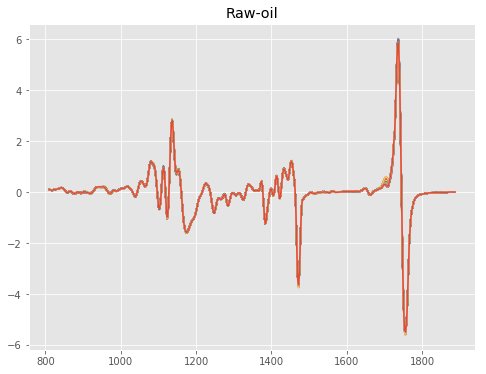

In [13]:
plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    
    plt.plot(wl, oil.T)
    plt.title('Raw-oil')

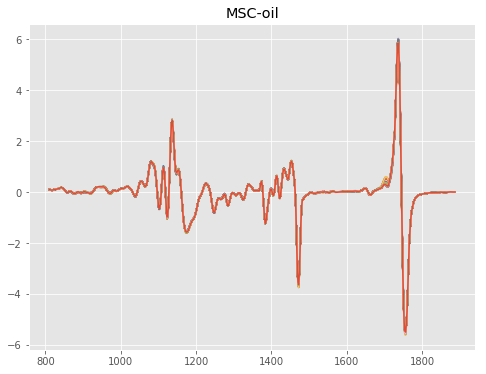

In [14]:
plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    
    plt.plot(wl, oil_msc.T)
    plt.title('MSC-oil')

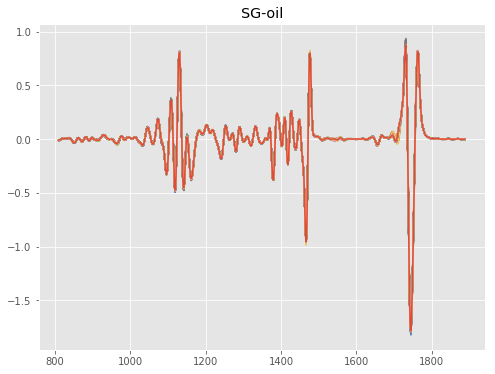

In [15]:
plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    
    plt.plot(wl, oil_sg.T)
    plt.title('SG-oil')

In [16]:
##PCA plots for oil from different countries

In [17]:
pca_oil = PCA(n_components=3)
principalComponents_oil = pca_oil.fit_transform(oil_msc)

principal_oil_Df = pd.DataFrame(data = principalComponents_oil, columns = ['principal component 1','principal component 2', 'principal component 3'])

principal_oil_Df.tail()

print('Explained variation per principal component: {}'.format(pca_oil.explained_variance_ratio_))


Explained variation per principal component: [0.46136459 0.25205812 0.05787595]


<Figure size 432x288 with 0 Axes>

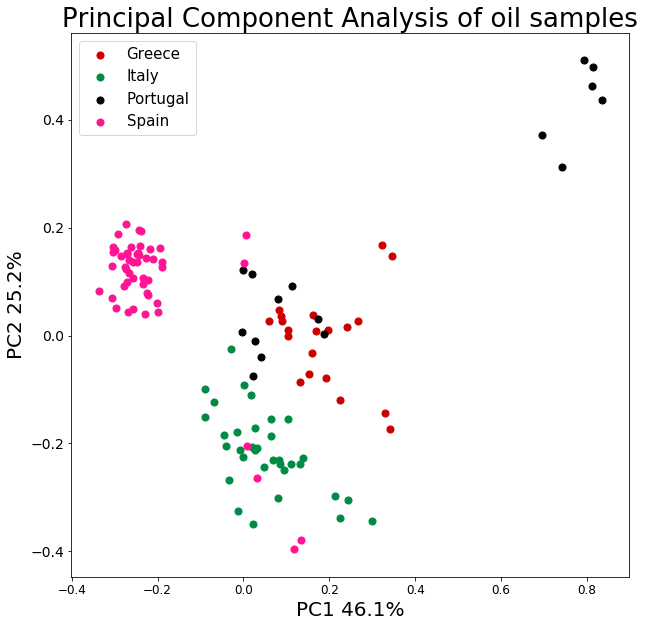

In [18]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1 46.1%',fontsize=20)
plt.ylabel('PC2 25.2%',fontsize=20)
plt.title("Principal Component Analysis of oil samples",fontsize=26)

targets = ["Greece","Italy","Portugal", "Spain"]
colors = ["#CD0000", "#008B45", "#000000", "#FF1493"]
for target, color in zip(targets,colors):
    indicesToKeep = df['Countries'] == target
    plt.scatter(principal_oil_Df.loc[indicesToKeep, 'principal component 1']
               , principal_oil_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [19]:
##Linear Discriminant analysis

In [20]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
df = pd.read_csv("FTIR_Spectra_olive_oils.csv")

In [22]:
y = df.values[:,1].astype('uint8')
X = df.values[:,3:]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
 
lda = LDA()
lda.fit(X_train,y_train)
 
y_pred = lda.predict(X_test)

##The LDA accuracy is 

print(lda.score(X_test,y_test))

0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [55]:
scores = cross_val_score(LDA(), X, y, cv=4)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9171 (+/- 0.1112)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [35]:
## Prepare the Data for Machine Learning Algorithms

In [36]:
## Transformation were did in data ploting therrefore the Oil-SG traformation were used for following ML

In [54]:
label = df.loc[:, "Group"]
data = pd.DataFrame(oil_sg)

In [52]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,549,550,551,552,553,554,555,556,557,558
0,-0.013771,-0.011093,-0.008415,-0.004440,0.001227,0.006254,0.008912,0.008953,0.007289,0.005425,...,0.002521,0.001917,0.000863,0.000048,-0.000001,0.000190,0.000161,-0.000162,-0.000702,-0.001241
1,-0.011543,-0.009808,-0.008072,-0.004530,0.001391,0.006788,0.009309,0.008388,0.005720,0.003732,...,0.003249,0.002605,0.001430,0.000353,-0.000242,-0.000775,-0.001199,-0.001440,-0.001643,-0.001846
2,-0.013340,-0.010054,-0.006768,-0.002647,0.002881,0.007588,0.010036,0.009524,0.006893,0.004179,...,0.003016,0.001813,0.000564,0.000052,0.000244,0.000444,0.000335,-0.000167,-0.000849,-0.001532
3,-0.010779,-0.008266,-0.005752,-0.002612,0.001880,0.006330,0.009046,0.008996,0.006843,0.004610,...,0.002337,0.002219,0.001558,0.000676,0.000046,-0.000240,-0.000515,-0.000908,-0.001239,-0.001570
4,-0.010726,-0.008678,-0.006629,-0.003743,0.000486,0.004738,0.007733,0.008400,0.007096,0.005488,...,0.003271,0.002669,0.001329,-0.000062,-0.000786,-0.000952,-0.000763,-0.000491,-0.000205,0.000081


In [39]:
## Training and Evaluating on the Training Set

In [55]:
label

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
90     4
91     4
92     4
93     4
94     4
95     4
96     4
97     4
98     4
99     4
100    4
101    4
102    4
103    4
104    4
105    4
106    4
107    4
108    4
109    4
110    4
111    4
112    4
113    4
114    4
115    4
116    4
117    4
118    4
119    4
Name: Group, Length: 120, dtype: int64

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
## Now there is a working Linear Regression model. Let’s try to use it to predict the country based on NIR data:

In [63]:
test_data = data.iloc[1:30,:]

In [64]:
test_label = label.iloc[1:30]

In [65]:
print("Predictions:", lin_reg.predict(test_data))

Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2.]


In [66]:
test_label

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
Name: Group, dtype: int64

In [67]:
## Measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function

In [68]:
from sklearn.metrics import mean_squared_error
group_predictions = lin_reg.predict(data)
lin_mse = mean_squared_error(label, group_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0998110755292505e-14

In [69]:
## Results is good but we didnot use traing set and prediction set it imeans the data could be overfitted.